<a href="https://colab.research.google.com/github/prashanth741/NLP-LAB/blob/main/15_09_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Columns: ['TV', 'Radio', 'Newspaper', 'Sales']
      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 270.9126 - mae: 15.6820 - val_loss: 98.9827 - val_mae: 9.9490
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 268.6928 - mae: 15.6175 - val_loss: 97.8490 - val_mae: 9.8919
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 268.5916 - mae: 15.5941 - val_loss: 96.6496 - val_mae: 9.8311
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 267.9605 - mae: 15.5989 - val_loss: 95.4705 - val_mae: 9.7709
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 264.1232 - mae: 15.4575 - val_loss: 94.3095 - val_mae: 9.7113
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 264.8130 - mae: 15.5037 - val_loss: 93.1617 - val_mae: 9.6520
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 263.3832 - mae: 15.4340 - val_loss: 91.9740 - val_mae: 9.5903
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 260.4335 - mae: 15.3442 - val_loss: 90.7030 - val_mae: 9.5238
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


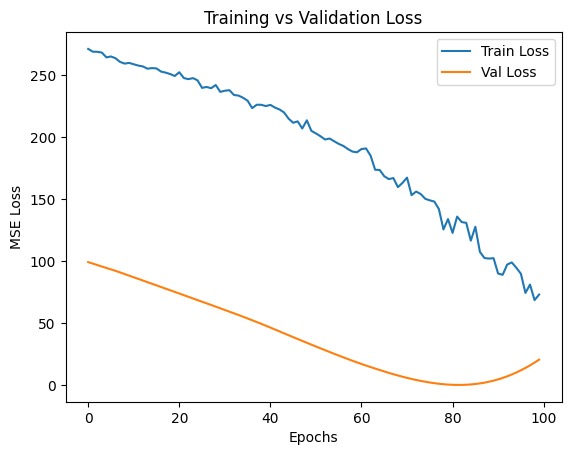

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


# 2
df = pd.read_csv("/content/advertising.csv")   # make sure file name is correct
print("Columns:", df.columns.tolist())
print(df.head())

# Features and Target
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']


# 3
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# 4.
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # regression output (no activation)

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train model
history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=100,
    batch_size=16,
    verbose=1
)


# 5
y_pred = model.predict(X_test_scaled).flatten()

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)


# 6
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Training vs Validation Loss")
plt.show()

